# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты.

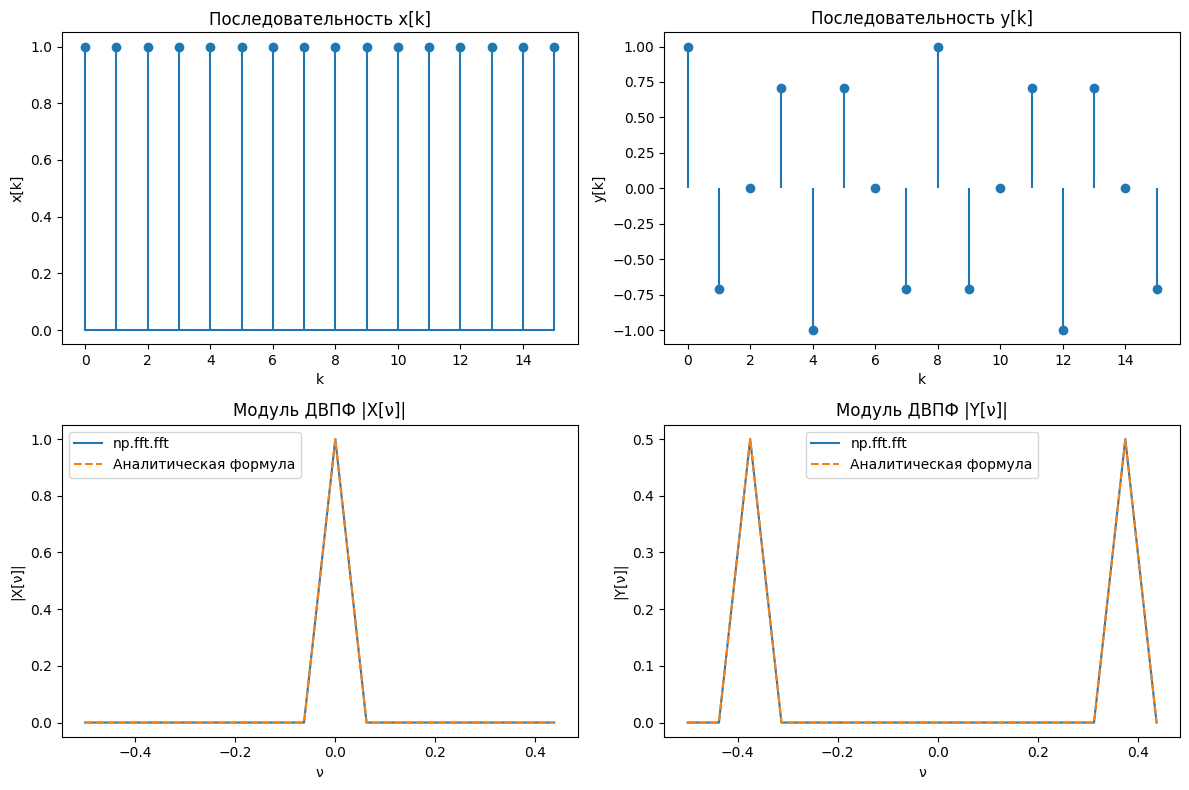

In [35]:
import numpy as np
import matplotlib.pyplot as plt

#Variant 6
N = 16
n0 = 6

k = np.arange(N)
nu = np.fft.fftfreq(N, d=1) # freq for DTFT [-0.5, 0.5]

x = np.ones(N) # N rectangle
y = x * np.cos(2 * np.pi * k * n0 / N) # x[k] * cos

X_fft = np.fft.fft(x) / N
Y_fft = np.fft.fft(y) / N

X_fft_shift = np.fft.fftshift(X_fft)
Y_fft_shift = np.fft.fftshift(Y_fft)
nu_shift = np.fft.fftshift(nu)

X_nu = N * np.sinc(nu_shift * N) / N
Y_nu = 0.5 * (np.roll(X_nu, n0) + np.roll(X_nu, -n0))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.stem(k, x, basefmt="")
plt.title("Последовательность x[k]")
plt.xlabel("k")
plt.ylabel("x[k]")

yp = plt.subplot(2, 2, 2)
plt.stem(k, y, basefmt=" ")
plt.title("Последовательность y[k]")
plt.xlabel("k")
plt.ylabel("y[k]")

plt.subplot(2, 2, 3)
plt.plot(nu_shift, np.abs(X_fft_shift), label="np.fft.fft")
plt.plot(nu_shift, np.abs(X_nu), '--', label="Аналитическая формула")
plt.title("Модуль ДВПФ |X[ν]|")
plt.xlabel("ν")
plt.ylabel("|X[ν]|")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(nu_shift, np.abs(Y_fft_shift), label="np.fft.fft")
plt.plot(nu_shift, np.abs(Y_nu), '--', label="Аналитическая формула")
plt.title("Модуль ДВПФ |Y[ν]|")
plt.xlabel("ν")
plt.ylabel("|Y[ν]|")
plt.legend()

plt.tight_layout()
plt.show()


## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

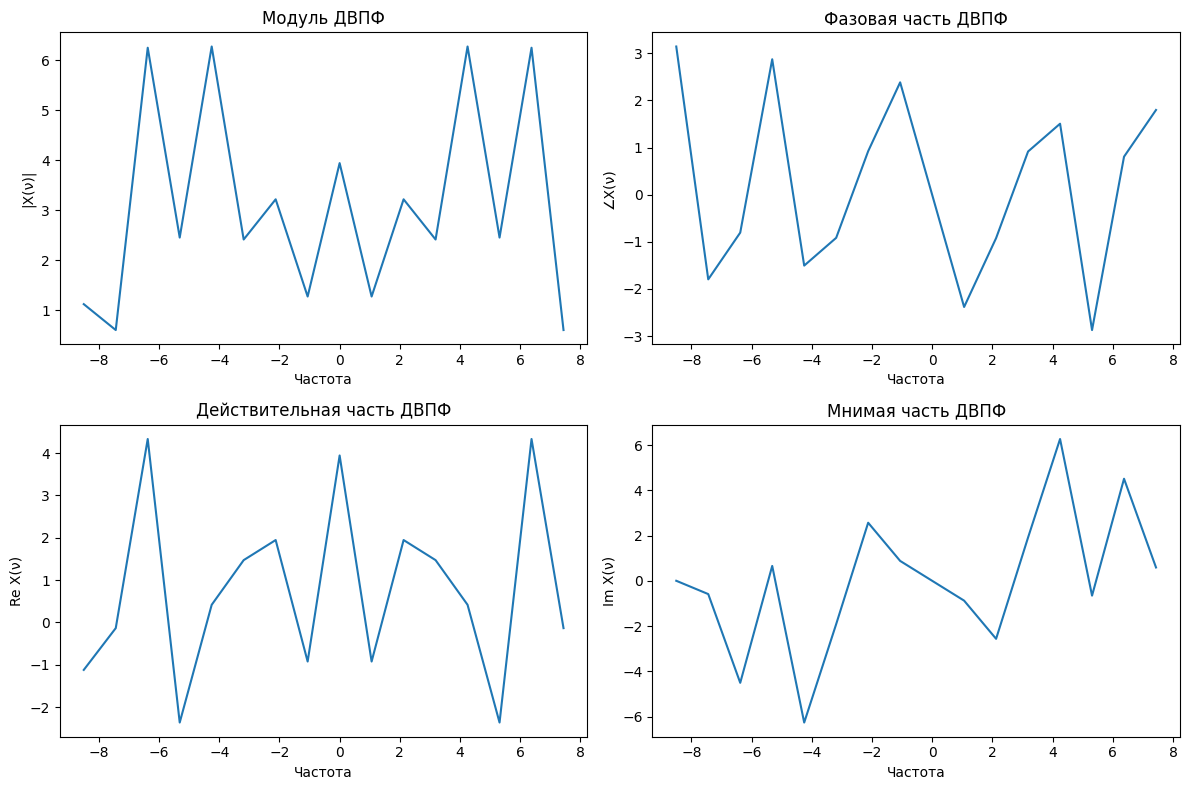

In [47]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
x = np.random.randn(N)

nu = np.fft.fftshift(np.fft.fftfreq(N, d=1/(N+1)))

X = np.fft.fft(x)

magnitude = np.abs(X)
phase = np.angle(X)
real = np.real(X)
imag = np.imag(X)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(nu, magnitude)
plt.title('Модуль ДВПФ')
plt.xlabel("Частота")
plt.ylabel("|X(ν)|")

plt.subplot(2, 2, 2)
plt.plot(nu, phase)
plt.title('Фазовая часть ДВПФ')
plt.xlabel("Частота")
plt.ylabel("∠X(ν)")

plt.subplot(2, 2, 3)
plt.plot(nu, real)
plt.title('Действительная часть ДВПФ')
plt.xlabel("Частота")
plt.ylabel("Re X(ν)")

plt.subplot(2, 2, 4)
plt.plot(nu, imag)
plt.title('Мнимая часть ДВПФ')
plt.xlabel("Частота")
plt.ylabel("Im X(ν)")

plt.tight_layout()
plt.show()


# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python.
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

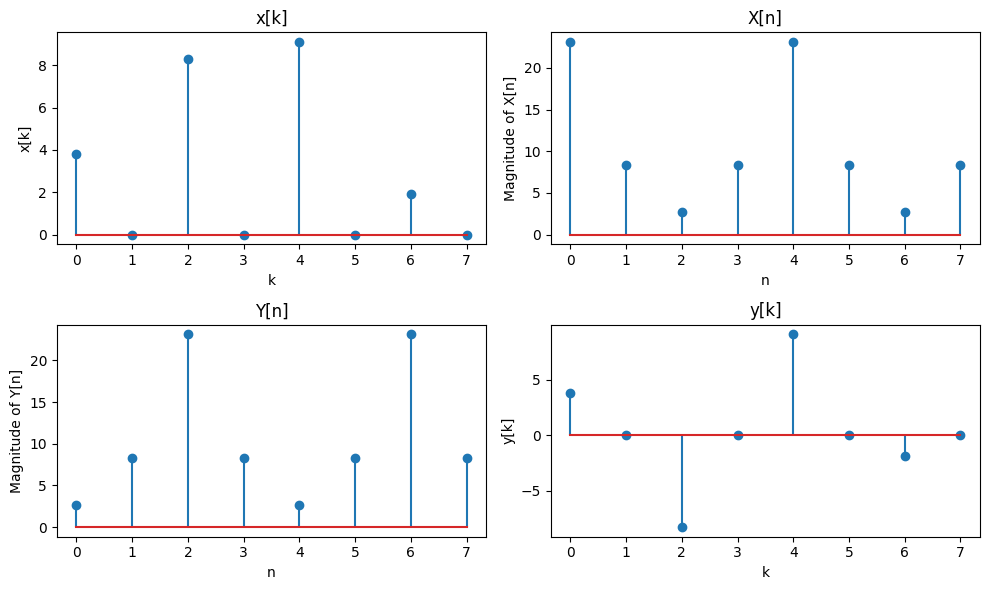

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# W_ab = exp(j * 2pi * a * b / l)
# X[n] = Sum(x[k] * W_kn)
# Y[n] = X[(n + n0) mod l]
# Y[n] = Sum(x[k] * W_kn * W_kn0)
# Y[n] = Sum(W_kn0) * Sum(x[k] * W_kn) = Sum(W_kn0) * X[n]
# y[k] = Sum(W_kn0) * x[k]

n0 = -2
l = 8
x = np.array([3.8, 0, 8.3, 0, 9.1, 0, 1.9, 0])

X = np.fft.fft(x)
Y = np.roll(X, n0)
y = np.fft.ifft(Y)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.stem(x)
plt.title("x[k]")
plt.xlabel("k")
plt.ylabel("x[k]")

plt.subplot(2, 2, 2)
plt.stem(np.abs(X))
plt.title("X[n]")
plt.xlabel("n")
plt.ylabel("Magnitude of X[n]")

plt.subplot(2, 2, 3)
plt.stem(np.abs(Y))
plt.title("Y[n]")
plt.xlabel("n")
plt.ylabel("Magnitude of Y[n]")

plt.subplot(2, 2, 4)
plt.stem(np.real(y))
plt.title("y[k]")
plt.xlabel("k")
plt.ylabel("y[k]")

plt.tight_layout()
plt.show()


## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде.

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$.
Сравните с результатами, полученными в п.2 и п.3.


Среднее арифметическое значение x[k]: 0.8333333333333334
Энергия сигнала: 55.416666666666664
Среднее арифметическое для восстановленной последовательности: 0.8333333333333334
Энергия восстановленной последовательности: 55.41666666666666


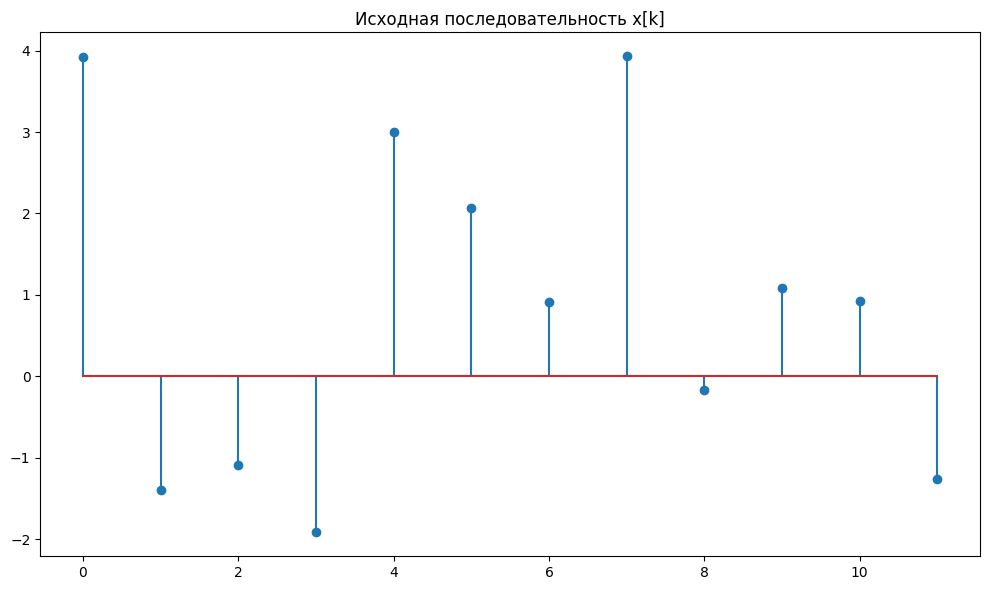

In [99]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([10, -6 + 3j, 6 + 3j, 6 - 1j, 1 - 6j, 9 + 5j, 5])

N = 12
l = len(X)
X_full = np.arange(N, dtype=complex)
for i in range (l):
  X_full[i] = X[i]
for i in range (l, N):
  X_full[i] = np.conj(X[l - i - 2])


mean_x = np.real(X_full[0]) / N
print("Среднее арифметическое значение x[k]:", mean_x)

energy = np.sum(np.abs(X_full)**2) / N
print("Энергия сигнала:", energy)

x_orig = np.fft.ifft(X_full)
mean_x_orig = np.mean(np.real(x_orig))
print("Среднее арифметическое для восстановленной последовательности:", mean_x_orig)

energy_orig = np.sum(np.abs(x_orig)**2)
print("Энергия восстановленной последовательности:", energy_orig)

plt.figure(figsize=(10, 6))

plt.subplot(1, 1, 1)
plt.title("Исходная последовательность x[k]")
plt.stem(np.real(x_orig))

plt.tight_layout()
plt.show()

## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для
$$
\begin{equation}
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью

 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```

 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

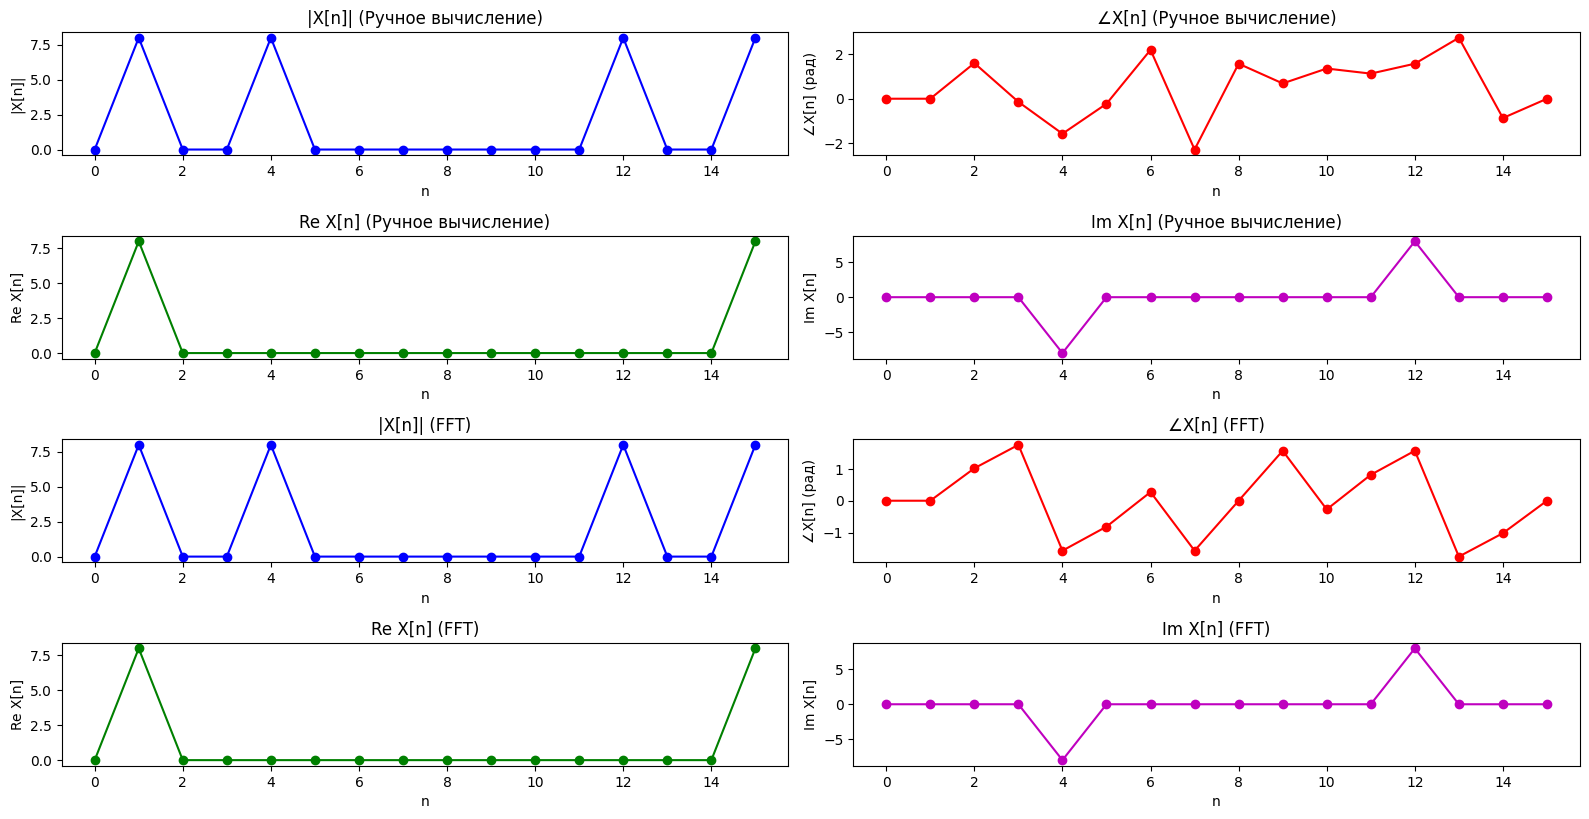

In [98]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
r1 = 1
r2 = 4

k = np.arange(N)
x = np.cos(2 * np.pi * r1 * k / N) + np.sin(2 * np.pi * r2 * k / N)

X_manual = np.zeros(N, dtype=complex)
for n in range(N):
  X_manual[n] = np.sum(x * np.exp(-2j * np.pi * n * k / N))

X_fft = np.fft.fft(x)

# m = 4
# X_shifted = np.zeros(N, dtype=complex)
# for n in range(N):
#   X_shifted[n] = np.exp(-2j * np.pi * n * m / N) * X_manual[n]

# X_exp = np.zeros(N, dtype=complex)
# for n in range(N):
#   X_exp[n] = np.sum(X_manual * np.exp(2j * np.pi * n * np.arange(N) / N)) / N
# ?????????????

plt.figure(figsize=(16, 16))

plt.subplot(8, 2, 1)
plt.plot(np.abs(X_manual), 'b-o')
plt.title('|X[n]| (Ручное вычисление)')
plt.xlabel('n')
plt.ylabel('|X[n]|')

plt.subplot(8, 2, 2)
plt.plot(np.angle(X_manual), 'r-o')
plt.title('∠X[n] (Ручное вычисление)')
plt.xlabel('n')
plt.ylabel('∠X[n] (рад)')

plt.subplot(8, 2, 3)
plt.plot(np.real(X_manual), 'g-o')
plt.title('Re X[n] (Ручное вычисление)')
plt.xlabel('n')
plt.ylabel('Re X[n]')

plt.subplot(8, 2, 4)
plt.plot(np.imag(X_manual), 'm-o')
plt.title('Im X[n] (Ручное вычисление)')
plt.xlabel('n')
plt.ylabel('Im X[n]')



plt.subplot(8, 2, 5)
plt.plot(np.abs(X_fft), 'b-o')
plt.title('|X[n]| (FFT)')
plt.xlabel('n')
plt.ylabel('|X[n]|')

plt.subplot(8, 2, 6)
plt.plot(np.angle(X_fft), 'r-o')
plt.title('∠X[n] (FFT)')
plt.xlabel('n')
plt.ylabel('∠X[n] (рад)')

plt.subplot(8, 2, 7)
plt.plot(np.real(X_fft), 'g-o')
plt.title('Re X[n] (FFT)')
plt.xlabel('n')
plt.ylabel('Re X[n]')

plt.subplot(8, 2, 8)
plt.plot(np.imag(X_fft), 'm-o')
plt.title('Im X[n] (FFT)')
plt.xlabel('n')
plt.ylabel('Im X[n]')


plt.tight_layout()
plt.show()

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики.

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



In [101]:
import numpy as np
import matplotlib.pyplot as plt

N = 12

w = np.array([sum(1 for m in range(N) if k - m >= 0) for k in range(N)])

print(w)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей.

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов).

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

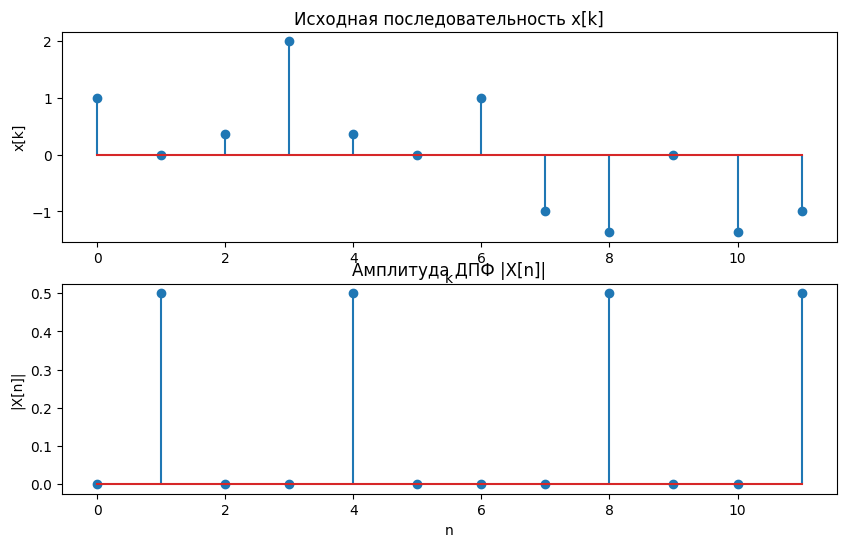

In [112]:
import numpy as np
import matplotlib.pyplot as plt


# x[k] = sin(2pi * k * r1 / N) + cos(2pi * k * r2 / N)
# W_kr = exp(2i * pi * k * r / N)
# x[k] = 1/2i * (W_kr1 - W_-kr1) + 1/2 * (W_kr2 + W_-kr2)
# X[n] = Sum(x[k] * W_-kn)
# S = (1 - exp(2i * pi * k * (r - n))) / (1 - exp(2i * pi * k * (r - n) / N))
# r = n -> Peek -> delta functions


N = 12
r1 = 1
r2 = 4

k = np.arange(N)
x = np.sin(2 * np.pi * k * r1 / N) + np.cos(2 * np.pi * k * r2 / N)

X = np.fft.fft(x) / N
freq= np.fft.fftfreq(N)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(k, x)
plt.title('Исходная последовательность x[k]')
plt.xlabel('k')
plt.ylabel('x[k]')

plt.subplot(2, 1, 2)
plt.stem(np.arange(N), np.abs(X))
plt.title('Амплитуда ДПФ |X[n]|')
plt.xlabel('n')
plt.ylabel('|X[n]|')

plt.show()


## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую,
* используя БПФ `fft(x, P)`.

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

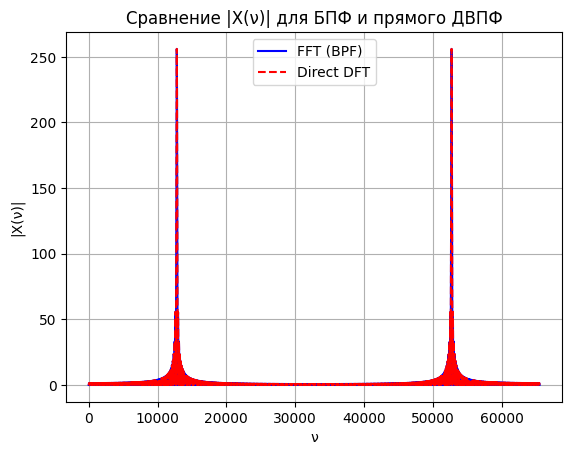

Максимальная ошибка между БПФ и прямым ДВПФ: 4.1312230620490155e-11
Время работы БПФ: 0.003922224044799805 секунд
Время работы прямого ДВПФ: 2.831338405609131 секунд


In [114]:
import numpy as np
import matplotlib.pyplot as plt
import time

N = 512
P = 65536
n0 = 100

k = np.arange(N)
x = np.sin(2 * np.pi * k * n0 / N)

def direct_dft(x, P):
  X = np.zeros(P, dtype=complex)
  for nu in range(P):
    X[nu] = np.sum(x * np.exp(-2j * np.pi * nu * k / P))
  return X

start_time_bpf = time.time()
X_bpf = np.fft.fft(x, P)
end_time_bpf = time.time()


start_time_direct = time.time()
X_direct = direct_dft(x, P)
end_time_direct = time.time()

error = np.max(np.abs(X_bpf - X_direct))

nu = np.arange(P)
plt.plot(nu, np.abs(X_bpf), label='FFT (BPF)', linestyle='-', color='b')
plt.plot(nu, np.abs(X_direct), label='Direct DFT', linestyle='--', color='r')
plt.xlabel('ν')
plt.ylabel('|X(ν)|')
plt.title('Сравнение |X(ν)| для БПФ и прямого ДВПФ')
plt.legend()
plt.grid(True)
plt.show()

print(f"Максимальная ошибка между БПФ и прямым ДВПФ: {error}")
print(f"Время работы БПФ: {end_time_bpf - start_time_bpf} секунд")
print(f"Время работы прямого ДВПФ: {end_time_direct - start_time_direct} секунд")


## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации;
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

audio_path = 'flute.wav'
